##### Model Building and Prediction
In this notebook, I am using Support Vector Regression to predict revenue. Using GridSearchCV to find best parameters for model. Also for model evaluation, I am using root mean squared log error.

In [20]:
import numpy as np
import eli5
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split
from collections import Counter
import wordcloud
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [44]:
from sklearn.metrics import mean_squared_log_error

In [21]:
data=r'C:\Users\bhardwaj\Downloads\tmdb-box-office-prediction\dataframe1.csv'

In [22]:
df=pd.read_csv(data)

In [23]:
df.set_index('id',inplace=True)

In [24]:
df['log_revenue']=np.log1p(df['revenue'])

In [25]:
df.drop(axis=1,columns='original_language',inplace=True)
df.drop(axis=1,columns='tagline',inplace=True)
df.drop(axis=1,columns='genres',inplace=True)
df.drop(axis=1,columns='belongs_to_collection',inplace=True)
df.drop(axis=1,columns='homepage',inplace=True)
df.drop(axis=1,columns='imdb_id',inplace=True)
df.drop(axis=1,columns='original_title',inplace=True)
df.drop(axis=1,columns='overview',inplace=True)
df.drop(axis=1,columns='poster_path',inplace=True)
df.drop(axis=1,columns='production_companies',inplace=True)
df.drop(axis=1,columns='production_countries',inplace=True)
df.drop(axis=1,columns='release_date',inplace=True)
df.drop(axis=1,columns='spoken_languages',inplace=True)
df.drop(axis=1,columns='status',inplace=True)
df.drop(axis=1,columns='title',inplace=True)
df.drop(axis=1,columns='Keywords',inplace=True)
df.drop(axis=1,columns='cast',inplace=True)
df.drop(axis=1,columns='crew',inplace=True)
df.drop(axis=1,columns='all_genres',inplace=True)
df.drop(axis=1,columns='all_lan',inplace=True)
df.drop(axis=1,columns='all_pcomp',inplace=True)
df.drop(axis=1,columns='all_pcoun',inplace=True)
df.drop(axis=1,columns='all_keyword',inplace=True)
df.drop(axis=1,columns='all_cast',inplace=True)
df.drop(axis=1,columns='release_date_year',inplace=True)
df.dropna(inplace=True)

In [26]:
X = df.drop(['log_revenue','revenue'], axis=1)

In [27]:
Y=df['log_revenue']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
from sklearn import svm

In [31]:
from sklearn.svm import SVR

In [32]:
regressor=SVR()

In [34]:
parameter = {'epsilon': [0.5,0.1,1,1.5,2,2.5,3]}

In [35]:
grid_search_svm = GridSearchCV(estimator = regressor, param_grid = parameter, cv =4)

In [36]:
grid_search_svm.fit(X_train, y_train)

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196:

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epsilon': [0.5, 0.1, 1, 1.5, 2, 2.5, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
grid_search_svm.best_params_

{'epsilon': 1.5}

In [42]:
model=SVR(epsilon=1.5).fit(X_train,y_train)

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
pred=model.predict(X_test)

In [45]:
root_MSLE=(mean_squared_log_error(pred,y_test))*0.5

In [46]:
root_MSLE

0.0237510995694839

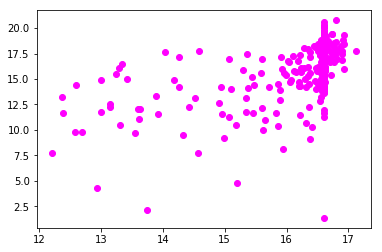

In [49]:
plt.scatter(pred,y_test,color='magenta')

With SVR, the root mean square log error is less than that for random forest.